In [1]:
from astropy.io import fits as astro_fits  
from astropy.io.fits import getdata

import copy
import glob

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import matplotlib as mpl 
from matplotlib.collections import LineCollection


import numpy as np
from IPython.display import HTML

import astropy.table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.visualization import AsymmetricPercentileInterval, ImageNormalize, LogStretch 

#These packages are for Using TrackPy
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp 
from numpy import sqrt  

In [2]:
List_2 = glob.glob(r'C:\Users\14242\2022 Summer Internship\Sun Pics Part 2 (10 pics)\*')

In [3]:
data_average = [] 
data_median = [] 
for Polar in List_2: 
    Polardata = getdata(Polar) 
    data_average.append(Polardata - np.average(Polardata)) 
    data_median.append(Polardata - np.median(Polardata)) 

In [4]:
Arr=np.array(data_average)

In [5]:
#For this I want to know how to create a loop for the difference
Diff = Arr[2] - Arr[1]

In [6]:
#To look how Diff would look like
#Diff

In [7]:
Diff = [] 
for i in range (1,len(Arr)-1): 
    Diff.append(Arr[i+1]-Arr[i])

In [8]:
#Just a plot for the Difference from the start

plt.figure(figsize=(10,10))
plt.imshow(Diff[0],vmin = -1, vmax = 1)  
plt.colorbar()
plt.show()

In [9]:
#This is to clean up the graph  
f = tp.locate(Arr[0], 11, invert = True, minmass = 70)

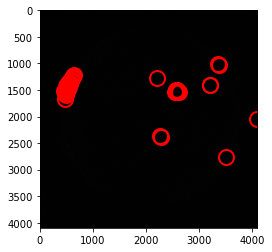

In [10]:
#This gives us the graph
tp.annotate(f,Arr[0]); 

In [11]:
#This is to find the specific  data for the one partical(easier to look at data)
f.iloc[34]

y           1504.197090
x           2591.875661
mass          75.525738
size           2.434594
ecc            0.321339
signal         4.395678
raw_mass   -1181.546494
ep            -0.089743
Name: 15440, dtype: float64

In [12]:
#Just created an array for the original radius of the sun. 
R = 1625.691406

In [14]:
#Tells us the frames and features of the photos
r = tp.batch(Arr[:10],11,minmass = 50, invert = True); 


Frame 9: 139 features


In [15]:
# The 5 here is the max displacement that the partical can travel 
#This tends to be small so it dosnet slow down the program  
#Memeory means the amount of frames that the partical can be missed 
#this is useful to give us the partical within the header
t = tp.link(r,5,memory = 9)

Frame 9: 139 trajectories present.


In [16]:
t.head 

<bound method NDFrame.head of                 y            x        mass      size       ecc    signal  \
0      692.731343  1109.121269   53.547349  2.945082  0.338276  2.197839   
100   1587.005459   497.195415   91.510021  2.855700  0.061035  3.496562   
98    1573.733840  3641.583650   52.548331  2.865489  0.471381  2.297741   
97    1570.725694  2568.932292   57.543419  3.121665  0.489026  2.397642   
96    1568.801406  2592.922671   56.844107  3.060319  0.108850  2.297741   
...           ...          ...         ...       ...       ...       ...   
1185  1404.645594  3190.159004   62.195084  2.969836  0.115198  2.382953   
1186  1405.854271   555.134243  165.972704  2.896640  0.289998  6.314826   
1187  1408.572741   515.320061   77.803428  3.265674  0.460669  3.336135   
1181  1383.453382   534.937843   65.173775  3.030919  0.374255  3.931873   
1277  3490.807175  2745.547085   53.139861  3.147353  0.315110  1.668067   

         raw_mass        ep  frame  particle  
0     -142

In [17]:
#This code with (t,5) filters out the particals that are spontanious 
#Will have to look at the data to see what frames are considered spontanious
t1 = tp.filter_stubs(t,5) 
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 549
After: 66


plt.figure()
tp.mass_size(t1.groupby('particle').mean());

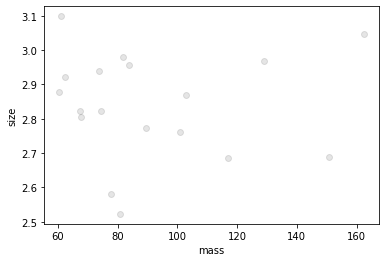

<AxesSubplot:xlabel='mass', ylabel='size'>

In [55]:
#Plots mass and size of Particle
plt.figure()
tp.mass_size(t2.iloc[iloc_valid].groupby('particle').mean())

In [19]:
#This cell will be for the code to filter out the particals that are not needed 
t2 = t1[((t1['mass'] >60 ) & (t1['size'] < 3.1) &
         (t1['ecc'] < 1))]

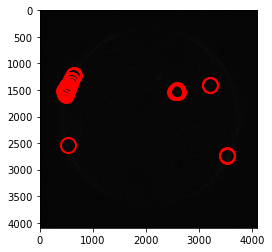

In [20]:
#pic of partical in t2
plt.figure()
tp.annotate(t2[t2['frame'] == 0], Arr[1]);

In [21]:
#This is a equation for the radius of the particals INSIDE of the Circle 
iloc_valid = []

for i in range(len(t)): #I changed f into t 
    r = np.sqrt((t2['x'].iloc[i]- 2070.828369)**2 + (t2['y'].iloc[i] - 2008.760620)**2)
    if r<R: 
        print(r, t2['particle'].iloc[i])
        iloc_valid.append(i)
    else: 
        print ('N/A')
         

    

N/A
N/A
674.5308589124434 12
664.4477202783263 13
714.4315619080177 18
N/A
702.7959270937081 20
N/A
N/A
711.6682277237475 26
N/A
N/A
N/A
1622.3342290833543 48
725.3100280235079 67
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
1285.926876056017 128
1285.3606857304387 130
N/A
N/A
665.5458529228126 13
N/A
703.3582265153116 138
674.220715662229 12
N/A
N/A
703.2933727320919 20
693.1450945915484 22
N/A
N/A
N/A
725.3617418385703 67
N/A
1511.3902526128961 155
N/A
N/A
N/A
N/A
729.1139114037122 179
N/A
N/A
N/A
N/A
N/A
N/A
N/A
1284.5312072980644 130
1285.5061110026961 128
N/A
703.029976022716 138
N/A
N/A
N/A
702.7775363160845 20
710.4539398414888 26
N/A
N/A
N/A
1511.5265514160942 155
N/A
N/A
N/A
N/A
N/A
N/A
N/A
691.741046147893 89
N/A
N/A
N/A
N/A
N/A
N/A
N/A
1284.7855242953551 130
1285.262929445316 128
N/A
676.8743390089522 12
665.5739715667306 13
N/A
703.0742782084978 20
691.6416922519616 22
N/A
710.168755897841 26
N/A
715.2688548105314 149
726.3378703360733 17
N/A
N/A
N/A
N/A
N/A
1511.5136557

IndexError: single positional indexer is out-of-bounds

In [22]:
#shows us the info on the particles inside of the circle
t2.iloc[iloc_valid].head

<bound method NDFrame.head of                  y            x        mass      size       ecc    signal  \
frame                                                                       
0      1542.103896  2557.884199   92.309235  2.500000  0.131089  4.895187   
0      1540.801980  2542.533239   70.630551  2.939753  0.200134  2.597446   
0      1529.648477  2600.794416   78.722595  2.861658  0.382564  4.595481   
0      1527.206987  2582.715284  114.387526  2.827964  0.250035  4.695383   
0      1513.112868  2581.519051  138.963362  2.768572  0.373013  6.393713   
...            ...          ...         ...       ...       ...       ...   
9      1527.723875  2569.346713  172.168383  3.025383  0.309571  5.123350   
9      1503.691434  2576.825593  115.454092  2.888360  0.332194  5.004202   
9      2533.204887   536.836466   63.386560  2.584657  0.107359  3.574430   
9      3472.753321  2448.846300   62.790822  2.708130  0.229857  3.216987   
9      1392.554562  3187.955277   66.603547  2

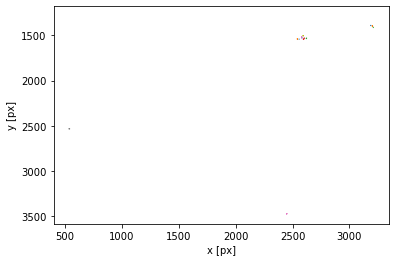

In [23]:
#takes into account ALL the Particals not the one we need
plt.figure()
tp.plot_traj(t2.iloc[iloc_valid]); 

In [24]:
#shows us the particle that are still valid
print (*iloc_valid)

2 3 4 6 9 13 14 27 28 31 33 34 37 38 42 44 49 57 58 60 64 65 69 77 85 86 88 89 91 92 94 96 97 103 117 119 121 122 123 127 128 135 147 154 155 157 158 159 160 163 175 177 180 182 183 184 185 188 191 192 198 205 209 211 212 214 215 216 222 231 232 233 241 242 245 249 251 253 262 264 268 270 271 273 274 277 280 281 287 295


In [27]:
#These next code will be plotting lightcurve (signal)

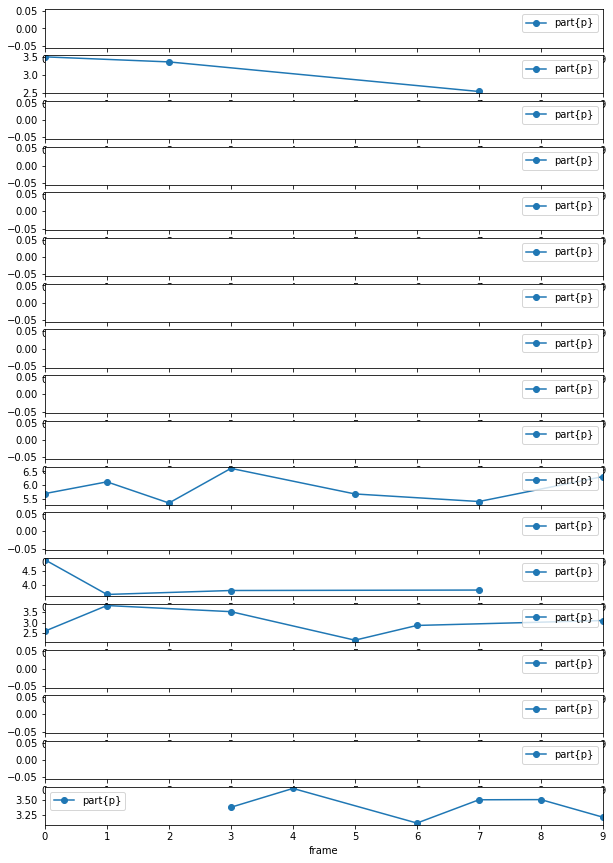

In [53]:
#Make Light curves 

Tot_part = len(t2.iloc[iloc_valid].particle.unique()) 
Position = range(1,Tot_part+1) 

fig = plt.figure(1,figsize = (10,15))
for p in range(Tot_part): 
    ax = fig.add_subplot(Tot_part, 1,Position[p])
    ax.set_xlim((0,9))
    t2.loc[t2.particle==p].plot(x='frame',y='signal', 
                               style = '-o',label ='part{p}',ax=ax)
plt.show()


